In [1]:
import pyfesom2 as pf
import xarray as xr
import os
import pandas as pd
from collections import OrderedDict
from itertools import product
import matplotlib.pylab as plt
%matplotlib inline

osgeo is not installed, conversion to Geo formats like Geotiff (fesom2GeoFormat) will not work.


In [2]:
# parameters cell
meshpath = "/Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/"
abg = [50, 15, -90]
variable = 'temp'
input_paths = [
    "/Users/nkolduno/PYTHON/DATA/output_7_8/",
    "/Users/nkolduno/PYTHON/DATA/output_7_10",
]
input_names = ['control', 'opt1']
years = range(1978, 1986)

reference_path = '/Users/nkolduno/PYTHON/DATA/CLIM_on_mesh/core2_meanz/'
reference_name = 'clim'
reference_years = 1948

figsize=(10, 5)
dpi = 200
region = "Global Ocean"
uplow = [0, 700]
ofile = None

In [3]:
if input_names is None:
    input_names = []
    for run in input_paths:
        run = os.path.join(run, '')
        input_names.append(run.split('/')[-2])

In [ ]:
mesh = pf.load_mesh(meshpath, abg=abg, 
                    usepickle=True, usejoblib=False)

In [ ]:
ocean_int = OrderedDict()
data_reference = pf.get_data(reference_path, variable, reference_years, mesh, how='mean', silent=True)
for exp_path, exp_name  in zip(input_paths, input_names):
    ocean_int[exp_name] = {}
    ocean_int[exp_name]['data'] = pf.get_data(exp_path, variable, years, mesh, how=None, compute=False, silent=True)

In [26]:
at_level = {}
mask=pf.get_mask(mesh, region)
at_level['reference'] = {}
at_level['reference']['data'] = pf.volmean_data(data_reference, mesh, [uplow[0], uplow[1]], mask=mask )
for key, value in ocean_int.items():
    at_level[key] = {}
    at_level[key]['data'] = pf.volmean_data(value['data'], mesh, [uplow[0], uplow[1]], mask=mask )
    at_level[key]['difference'] = at_level[key]['data'] - at_level['reference']['data']
del at_level['reference']

Upper depth: 0.0, Lower depth: -680.0
Upper depth: 0.0, Lower depth: -680.0
Upper depth: 0.0, Lower depth: -680.0


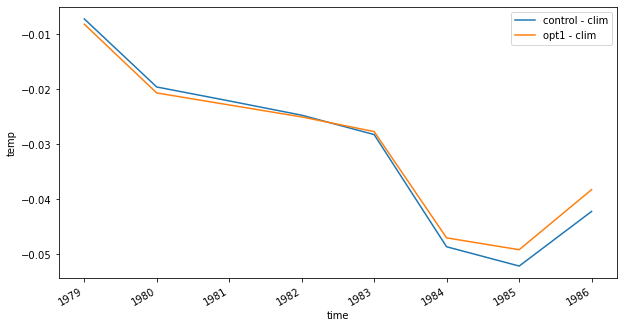

In [27]:
plt.figure(figsize=figsize)
n = 0
for key, value in at_level.items():
    if n<10:
        value['difference'].plot(label=f'{key} - {reference_name}', linestyle='-')
    else:
        value['difference'].plot(label=f'{key} - {reference_name}', linestyle='--')
    n = n+1
plt.legend()
if ofile is not None:
    plt.savefig(ofile, dpi=dpi)
    os.system(f'convert {ofile} -trim {ofile}_trimmed.png')
    os.system(f'mv {ofile}_trimmed.png {ofile}')